In [ ]:
import pandas as pd

# Load dataset (update path if needed)
file_path = "D:\min_project.5\chatgpt_style_reviews_dataset.xlsx - Sheet1.csv"
df = pd.read_csv(file_path)

# Display basic info
print("Shape of dataset:", df.shape)
print("\nColumns in dataset:", df.columns.tolist())

# Preview first 5 rows
df.head()


Shape of dataset: (50, 12)

Columns in dataset: ['date', 'title', 'review', 'rating', 'username', 'helpful_votes', 'review_length', 'platform', 'language', 'location', 'version', 'verified_purchase']


,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase
0,2024-12-24,East list local interesting far magazine father.,Impressive natural language understanding. Alm...,1,darren55,25,9,Google Play,de,Nepal,2.0.4,No
1,2024-07-26,Road determine picture figure hard experience ...,Sometimes gives wrong answers or outdated info...,2,davistyler,35,14,Flipkart,es,Panama,2.6.5,No
2,2024-08-22,Policy social past analysis whole.,Great tool for generating content quickly. Int...,5,andrea59,94,10,App Store,es,Denmark,4.2.2,No
3,2025-04-24,News financial billion four foreign.,Great tool for generating content quickly. Sta...,3,dcooper,50,15,Amazon,de,Brunei Darussalam,4.4.2,No
4,2024-08-15,To skill she case sing stop likely.,Excellent for language translation and grammar...,1,christine79,33,11,Flipkart,fr,United States Minor Outlying Islands,5.1.1,Yes


In [2]:
# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")



Missing values per column:
date                 0
title                0
review               0
rating               0
username             0
helpful_votes        0
review_length        0
platform             0
language             0
location             0
version              0
verified_purchase    0
dtype: int64

Number of duplicate rows: 0


In [6]:
# Text Cleaning and Preprocessing
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download required NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # Lowercase
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize
    tokens = nltk.word_tokenize(text)
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    # Join tokens back to string
    return " ".join(tokens)

# Apply cleaning to the 'review' column
df['cleaned_review'] = df['review'].apply(clean_text)

# Preview cleaned text
df[['review', 'cleaned_review']].head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\Administrator/nltk_data'
    - 'c:\\Users\\Administrator\\AppData\\Local\\Programs\\Python\\Python39\\nltk_data'
    - 'c:\\Users\\Administrator\\AppData\\Local\\Programs\\Python\\Python39\\share\\nltk_data'
    - 'c:\\Users\\Administrator\\AppData\\Local\\Programs\\Python\\Python39\\lib\\nltk_data'
    - 'C:\\Users\\Administrator\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [4]:
!pip install nltk 


You should consider upgrading via the 'c:\users\administrator\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [5]:
!pip install nltk --quiet


You should consider upgrading via the 'c:\users\administrator\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [7]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [8]:
import nltk

# Force download to your user directory
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.data.path.append(r"C:\Users\Administrator\AppData\Roaming\nltk_data")


In [10]:
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

def clean_text_simple(text):
    # Lowercase
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    # Remove stopwords using sklearn
    words = [word for word in text.split() if word not in ENGLISH_STOP_WORDS]
    return " ".join(words)

# Apply the simple cleaning function
df['cleaned_review'] = df['review'].apply(clean_text_simple)

# Preview cleaned text
df[['review', 'cleaned_review']].head()


,review,cleaned_review
0,Impressive natural language understanding. Alm...,impressive natural language understanding good...
1,Sometimes gives wrong answers or outdated info...,gives wrong answers outdated info student move...
2,Great tool for generating content quickly. Int...,great tool generating content quickly interest...
3,Great tool for generating content quickly. Sta...,great tool generating content quickly start me...
4,Excellent for language translation and grammar...,excellent language translation grammar fixes p...


In [11]:
# Create sentiment labels from rating
def get_sentiment(rating):
    if rating <= 2:
        return "Negative"
    elif rating == 3:
        return "Neutral"
    else:
        return "Positive"

df['sentiment'] = df['rating'].apply(get_sentiment)

# Preview
df[['rating', 'sentiment', 'cleaned_review']].head()

# Check sentiment distribution
df['sentiment'].value_counts()


sentiment
Negative    20
Positive    17
Neutral     13
Name: count, dtype: int64

C:\Users\Administrator\AppData\Local\Temp\ipykernel_6288\1482342380.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=df, palette='viridis')


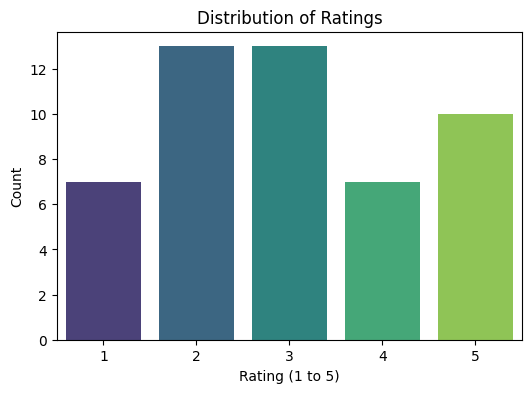

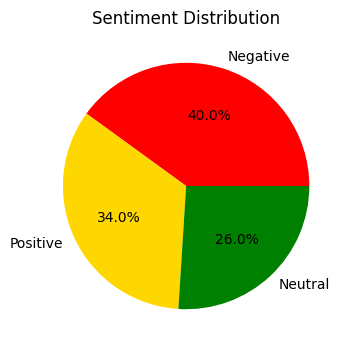

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Rating distribution
plt.figure(figsize=(6,4))
sns.countplot(x='rating', data=df, palette='viridis')
plt.title("Distribution of Ratings")
plt.xlabel("Rating (1 to 5)")
plt.ylabel("Count")
plt.show()

# 2. Sentiment distribution
plt.figure(figsize=(6,4))
df['sentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['red','gold','green'])
plt.title("Sentiment Distribution")
plt.ylabel("")
plt.show()


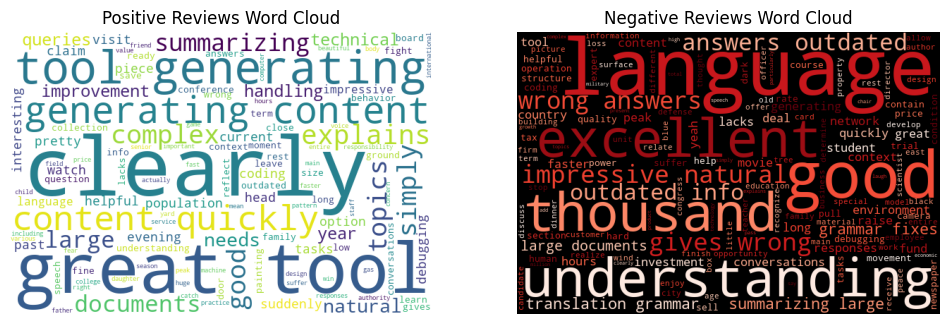

In [15]:
from wordcloud import WordCloud

# Separate text by sentiment
positive_text = " ".join(df[df['sentiment']=="Positive"]['cleaned_review'])
negative_text = " ".join(df[df['sentiment']=="Negative"]['cleaned_review'])

# Generate word clouds
plt.figure(figsize=(12,6))

# Positive reviews
plt.subplot(1,2,1)
WordCloud(width=600, height=400, background_color='white').generate(positive_text)
plt.imshow(WordCloud(width=600, height=400, background_color='white').generate(positive_text))
plt.axis('off')
plt.title("Positive Reviews Word Cloud")

# Negative reviews
plt.subplot(1,2,2)
plt.imshow(WordCloud(width=600, height=400, background_color='black', colormap='Reds').generate(negative_text))
plt.axis('off')
plt.title("Negative Reviews Word Cloud")

plt.show()


In [14]:
!pip install wordcloud --quiet


You should consider upgrading via the 'c:\users\administrator\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 6.1: Split data
X = df['cleaned_review']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 6.2: TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Step 6.3: Train Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

# Step 6.4: Evaluate Model
y_pred = model.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.3

Classification Report:
               precision    recall  f1-score   support

    Negative       0.43      0.75      0.55         4
     Neutral       0.00      0.00      0.00         3
    Positive       0.00      0.00      0.00         3

    accuracy                           0.30        10
   macro avg       0.14      0.25      0.18        10
weighted avg       0.17      0.30      0.22        10


Confusion Matrix:
 [[3 0 1]
 [1 0 2]
 [3 0 0]]


c:\Users\Administrator\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Administrator\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Administrator\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [17]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 1: Create a pipeline (TF-IDF + Logistic Regression)
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=2000, ngram_range=(1,2))),
    ('clf', LogisticRegression(max_iter=1000))
])

# Step 2: Stratified 5-Fold Cross Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(pipeline, X, y, cv=skf, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", scores)
print("Average Accuracy:", scores.mean())

# Step 3: Train Final Model
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# Step 4: Evaluation
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Cross-Validation Accuracy Scores: [0.2 0.3 0.3 0.5 0.4]
Average Accuracy: 0.34

Accuracy: 0.3

Classification Report:
               precision    recall  f1-score   support

    Negative       0.43      0.75      0.55         4
     Neutral       0.00      0.00      0.00         3
    Positive       0.00      0.00      0.00         3

    accuracy                           0.30        10
   macro avg       0.14      0.25      0.18        10
weighted avg       0.17      0.30      0.22        10


Confusion Matrix:
 [[3 0 1]
 [1 0 2]
 [3 0 0]]


c:\Users\Administrator\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Administrator\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Administrator\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  